## Vanguard Experiment A/B test

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [129]:
df_final_demo = pd.read_csv("C:\\Users\\rupes\\OneDrive\\Documents\\GitHub\\vanguard-ab-tes\\download file\\df_final_demo.txt")

In [130]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [131]:
Digital_Footprints_df1 = pd.read_csv("C:\\Users\\rupes\\OneDrive\\Documents\\GitHub\\vanguard-ab-tes\\download file\\df_final_web_data_pt_1.txt")
Digital_Footprints_df1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [132]:
Digital_Footprints_df2 = pd.read_csv("C:\\Users\\rupes\\OneDrive\\Documents\\GitHub\\vanguard-ab-tes\\download file\\df_final_web_data_pt_2.txt")
Digital_Footprints_df2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [133]:
Digital_Footprints_df1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [134]:
df_final_experiment_clients=pd.read_csv (r"C:\Users\rupes\OneDrive\Documents\GitHub\vanguard-ab-tes\download file\df_final_experiment_clients.txt")

In [135]:
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [136]:
merged_df = pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='inner')

In [137]:
merged_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


## Cleaning data finding null and duplicate 

In [138]:
merged_df.describe()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [139]:
#finding null value
merged_df.isnull().sum() 


client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
Variation           20109
dtype: int64

In [140]:

merged_df.loc[merged_df["clnt_age"].isna()]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0,Control
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test


In [141]:
# dropping the 14 na from gender column

merged_df_afterdrop =merged_df["gendr"].dropna()

In [142]:
merged_df.dropna(subset='gendr',inplace=True)

In [143]:
merged_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [144]:
merged_df.isnull().sum()

client_id               0
clnt_tenure_yr          0
clnt_tenure_mnth        0
clnt_age                1
gendr                   0
num_accts               0
bal                     0
calls_6_mnth            0
logons_6_mnth           0
Variation           20107
dtype: int64

In [145]:
merged_df.duplicated().sum() # no duplicates 

0

## replacing client age with mode

In [146]:
mode_clnt_age = merged_df['clnt_age'].mode()[0]

# Replace missing values in 'clnt_age' with the mode
merged_df['clnt_age'].fillna(mode_clnt_age, inplace=True)

In [147]:
merged_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [148]:
merged_df.isnull().sum()

client_id               0
clnt_tenure_yr          0
clnt_tenure_mnth        0
clnt_age                0
gendr                   0
num_accts               0
bal                     0
calls_6_mnth            0
logons_6_mnth           0
Variation           20107
dtype: int64

In [149]:
#Who are the primary clients using this online process?
merged_df.describe().round(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70595.00,70595.00,70595.00,70595.00,70595.00,70595.00,70595.00,70595.00
mean,5005020.95,12.05,150.66,46.44,2.26,147445.24,3.38,5.57
std,2877269.22,6.87,82.09,15.59,0.53,301508.71,2.24,2.35
min,169.00,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,2519604.50,6.00,82.00,32.50,2.00,37346.84,1.00,4.00
50%,5016969.00,11.00,136.00,47.00,2.00,63332.90,3.00,5.00
75%,7483063.50,16.00,192.00,59.00,2.00,137544.90,6.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


In [150]:
#top 30 primary customer base on 6 months logs.
Top_30_logons_6_mnth = merged_df.head(30)
Top_30_logons_6_mnth

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test


C:\Users\rupes\AppData\Local\Temp\ipykernel_14088\763458687.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gendr', y='logons_6_mnth', data=gender_logons, palette='Set2')


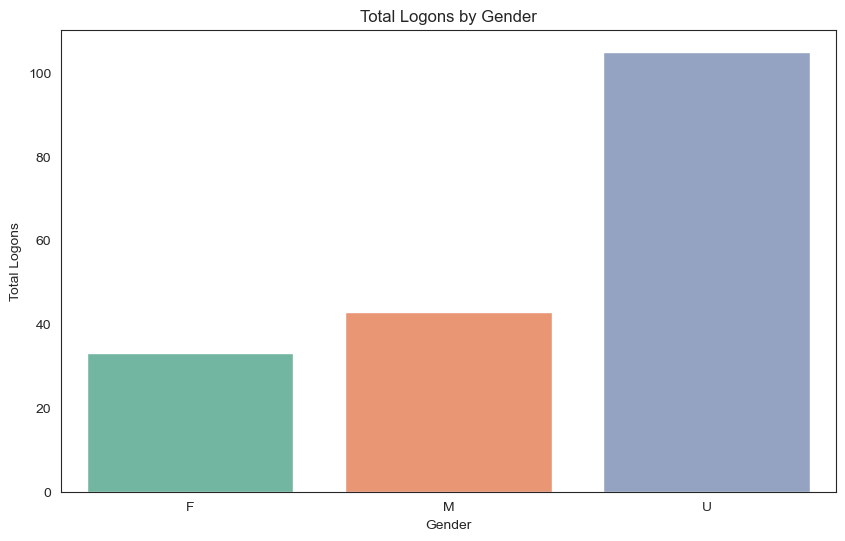

In [151]:
gender_logons = Top_30_logons_6_mnth.groupby('gendr')['logons_6_mnth'].sum().reset_index()

# Bar Chart with a predefined palette
plt.figure(figsize=(10, 6))
sns.barplot(x='gendr', y='logons_6_mnth', data=gender_logons, palette='Set2')
plt.title('Total Logons by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Logons')
plt.show()

In [152]:
frequency_table = merged_df['logons_6_mnth'].value_counts()

# Calculating the proportion of each unique value in the 'logons_6_mnth'
proportion_table = merged_df['logons_6_mnth'].value_counts(normalize=True)

frequency_table, proportion_table

(logons_6_mnth
 9.0    12350
 3.0    10243
 4.0    10220
 7.0     9893
 5.0     9254
 6.0     7878
 8.0     4810
 2.0     3009
 1.0     2938
 Name: count, dtype: int64,
 logons_6_mnth
 9.0    0.174942
 3.0    0.145095
 4.0    0.144769
 7.0    0.140137
 5.0    0.131086
 6.0    0.111594
 8.0    0.068135
 2.0    0.042623
 1.0    0.041618
 Name: proportion, dtype: float64)

In [153]:
# #Measures of Dispersion fixed the range of the client age, taken out the outliner
merged_df_age = merged_df["clnt_age"].std()
print (f"Standart deviation for age data = {merged_df_age}" )
merged_df_varyans = merged_df["clnt_age"].var()
print (f"Varyans for age data = {merged_df_varyans}" )
df_age_range = merged_df["clnt_age"].max() - merged_df["clnt_age"].min()
print (f"range for age data = {df_age_range}" )

Q1 = merged_df['clnt_age'].quantile(0.25)
Q3 = merged_df['clnt_age'].quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print (Q3)
print (IQR)

Standart deviation for age data = 15.591228212290487
Varyans for age data = 243.08639716772282
range for age data = 82.5
32.5
59.0
26.5


In [154]:
# Define the bins for the age quantiles
bins = [10, 20, 40, 60, 70, 100]

# Create a new column 'clnt_age_quantile' by binning the 'clnt_age' column
merged_df['clnt_age_quantile'] = pd.cut(merged_df['clnt_age'], bins=bins, include_lowest=True)  

# Display the value counts for the new 'clnt_age_quantile' column
print(merged_df['clnt_age_quantile'].value_counts())


clnt_age_quantile
(40.0, 60.0]     28140
(20.0, 40.0]     25475
(60.0, 70.0]     11571
(70.0, 100.0]     3930
(9.999, 20.0]     1479
Name: count, dtype: int64


In [155]:
merged_df['clnt_age_quantile']

0        (60.0, 70.0]
1        (40.0, 60.0]
2        (20.0, 40.0]
3        (40.0, 60.0]
4        (20.0, 40.0]
             ...     
70604    (20.0, 40.0]
70605    (20.0, 40.0]
70606    (60.0, 70.0]
70607    (60.0, 70.0]
70608    (40.0, 60.0]
Name: clnt_age_quantile, Length: 70595, dtype: category
Categories (5, interval[float64, right]): [(9.999, 20.0] < (20.0, 40.0] < (40.0, 60.0] < (60.0, 70.0] < (70.0, 100.0]]

<Axes: xlabel='clnt_age_quantile'>

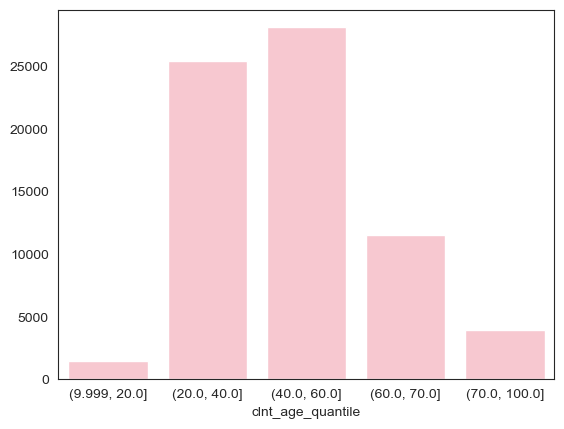

In [156]:
sns.barplot(x = merged_df['clnt_age_quantile'].value_counts().index, y = merged_df['clnt_age_quantile'].value_counts().values, color="pink")

In [158]:
# Create quantile bins for 'clnt_age'
df['clnt_age_quantile'] = pd.qcut(df['clnt_age'], q=4, labels=False)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='clnt_age_quantile', y='logons_6_mnth', data=df, palette="coolwarm")
plt.title('Boxplot of Logons in 6 Months by Client Age Quantile')
plt.xlabel('Client Age Quantile')
plt.ylabel('Logons in 6 Months')
plt.show()

NameError: name 'df' is not defined

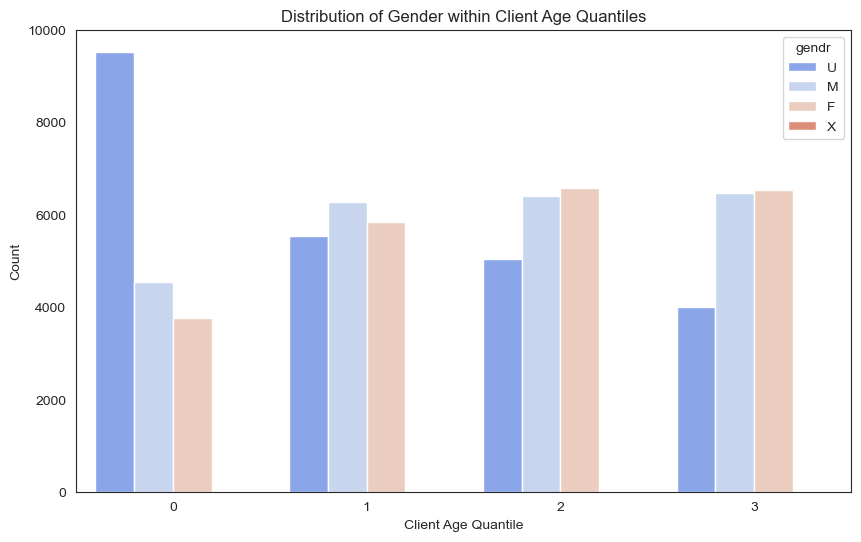

In [159]:
merged_df['clnt_age_quantile'] = pd.qcut(merged_df['clnt_age'], q=4, labels=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x ='clnt_age_quantile', hue='gendr', palette="coolwarm")
plt.title('Distribution of Gender within Client Age Quantiles')
plt.xlabel('Client Age Quantile')
plt.ylabel('Count')
plt.show()

In [160]:
merged_digital_footprint = pd.concat(
    [Digital_Footprints_df1, Digital_Footprints_df2],
    ignore_index=True,
    join='outer'
)
merged_digital_footprint

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [161]:
variance_with_merged_digital_footprint =pd.merge(merged_digital_footprint,df_final_experiment_clients, on='client_id', how='left')

     
variance_with_merged_digital_footprint.head(10)
                                        

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,Test


In [267]:
#making a copy of dt for further analysis
age_category = completed_df.copy()

#categorizing by ages 
age_no_duplicates = age_category.drop_duplicates(subset='client_id', keep='first')


In [269]:
completed_df.to_excel('completed_df.xlsx', index=False, engine='openpyxl')

In [164]:
#function to categorize by age:

def categorize_age(age):
    #if age <= 19:
        #return '<19'
    if 18 < age < 30:
        return '18-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    elif age >= 70:
        return '≥70'

In [165]:
#Applying the function of categorize_age
age_no_duplicates['age_category'] = age_no_duplicates['clnt_age'].apply(categorize_age)

# Categorize age in percentage 
age_counts = age_no_duplicates['age_category'].value_counts(normalize=True) * 100

C:\Users\rupes\AppData\Local\Temp\ipykernel_14088\3340941590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_no_duplicates['age_category'] = age_no_duplicates['clnt_age'].apply(categorize_age)


NameError: name 'os' is not defined

<Figure size 1000x600 with 0 Axes>

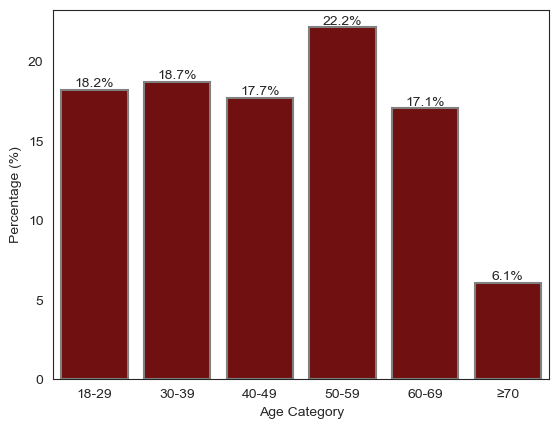

In [166]:
# Define the order of age categories
age_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '≥70']

# Reindex to ensure the correct order
age_percentage_ordered = age_counts.reindex(age_order).fillna(0)

# Set style and background
sns.set_style("white")  # No gridlines
plt.figure(figsize=(10, 6))
plt.figure(facecolor='None')  # Transparent background

#maroon_color_rgb= (189/255, 66/255, 46/255)  # RGB values for maroon


# Create the bar plot with light maroon color
sns.barplot(x=age_percentage_ordered.index, y=age_percentage_ordered.values, color="#800000", edgecolor='gray', linewidth=1.5)
#976255
# Add titles and labels
#plt.title('Percentage of Clients by Age')
plt.xlabel('Age Category')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for index, value in enumerate(age_percentage_ordered.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')




# Save the plot with transparent background
plt.savefig(os.path.join(save_path, 'age_distribution.png'), dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

In [167]:
#spliting the data in test and control 
test_data_1 = completed_df[completed_df['Variation'] == 'Test']
control_data_1 = completed_df[completed_df['Variation'] == 'Control']

In [168]:
control_data_1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_quantile,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321181,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
321182,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
321183,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
321184,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [169]:
#function to calculate the time between steps:

def subtract_date_column(Digital_Footprints_df1, Digital_Footprints_df2):
     # Merge DataFrames on 'client_id' with custom suffixes
    merged_df_custom = pd.merge(Digital_Footprints_df1, Digital_Footprints_df2, on='client_id', suffixes=('_step_x', '_step_y'))
    
    # Subtract 'date_time' column of df2 from 'date_time' column of df1
    result_df = pd.DataFrame()
    result_df['time_step_z'] = merged_df_custom['date_time_step_x'] - merged_df_custom['date_time_step_y']
    
    return result_df

In [170]:
#Test analysis, #creating a df for test_data_1  to try differents approaches
test_data_1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_quantile,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,3,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,3,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,3,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,3,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,3,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


#### create a new column for process_step with numbers instead of words

In [ ]:
#Test DATA Analysis

In [179]:
tested =test_data_1

In [174]:
# create a new column for process_step with numbers instead of words
#using .loc to avoid the error 
name_to_value = {
    "start": "1",
    "step_1": "2",
    "step_2": "3",
    "step_3": "4",
    "confirm": "5"

}
tested.loc[:, 'process_step_n'] = tested['process_step'].map(name_to_value)

# Fixing the second warning by using .loc
tested.loc[:, 'date_time'] = pd.to_datetime(tested['date_time'])

# Fixing the third warning by avoiding inplace modification
tested = tested.sort_values(by=["client_id", "date_time", "process_step_n"], ascending=[False, False, False])

In [175]:
#Grouping by client_id
tested_grouped = tested.groupby('client_id').first().reset_index()

In [265]:
tested_grouped.to_excel('test.xlsx', index=False, engine='openpyxl')

In [177]:
#Checking the amount of users in each step
tested_grouped["process_step"].value_counts()

process_step
confirm    18160
start       5577
step_1      1651
step_3      1002
step_2       571
Name: count, dtype: int64

## Step 1 - Test

In [180]:
#filter by process step "start" 

filtered_data_start = tested[tested['process_step_n'] == "1"]

#creating new df for all the values of "start"

start_test_data = filtered_data_start.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
start_test_data = start_test_data.reset_index()

In [181]:
#filter by process step "step1" 

filtered_data_step1 = tested[tested['process_step_n'] == "2"]

#creating new df for all the values of "step1"

step1_test_data = filtered_data_step1.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step1_test_data = step1_test_data.reset_index()

In [182]:
#applying the function to calculate the time between steps
step_1_time_1 = subtract_date_column(step1_test_data, start_test_data)

## Confirm - Test

In [183]:
#filter by process step "confirm" 

filtered_data_confirm = tested[tested['process_step_n'] == "5"]

#creating new df for all the values of "confirm"

confirm_test_data = filtered_data_confirm.groupby('client_id').first()[["visit_id", 'date_time', 'gendr']]

# Reset index to make 'client_id' a column again
confirm_test_data = confirm_test_data.reset_index()

In [184]:
confirm_test_data["gendr"].value_counts()

gendr
U    6504
M    6350
F    5828
Name: count, dtype: int64

In [185]:
#applying the function to calculate the time between steps

step_confirm_time = subtract_date_column(confirm_test_data, start_test_data)

In [186]:
step_confirm_time

,time_step_z
0,0 days 00:02:38
1,0 days 00:06:17
2,0 days 02:17:48
3,1 days 06:32:56
4,55 days 16:54:55
...,...
18402,0 days 00:02:45
18403,0 days 00:04:12
18404,0 days 00:02:51
18405,0 days 00:01:59


In [187]:
#Convert "days" to type date
#filtering for those took less than one day and half an hour 
#mean of step 2 to step3

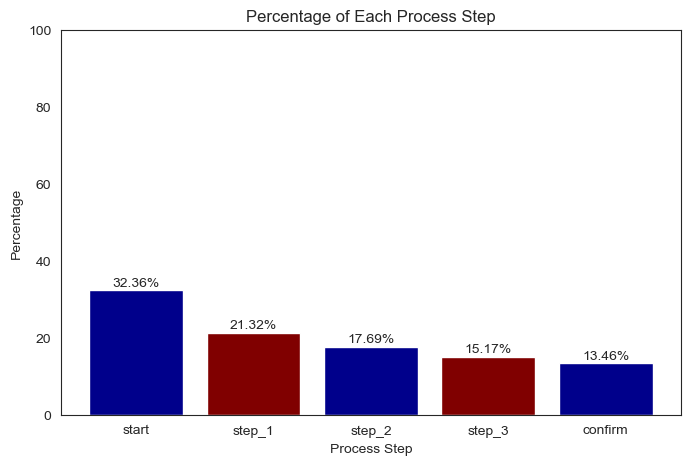

In [188]:
#plot Comparison of Confirmation Proportions
# Data


#values_test_data_1 = test_data_1[test_data_1['process_step'].isin(["confirm"])]
#values_control_data_1 = control_data_1[control_data_1['process_step'].isin(["confirm"])]

#categories = ['Control', 'Test']
#values = [values_test_data_1, values_control_data_1]


process_step_counts = completed_df['process_step'].value_counts(normalize=True) * 100
completed_df_percentage_df = process_step_counts.reset_index()

# Renaming columns for clarity
completed_df_percentage_df.columns = ['process_step', 'Percentage']

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(completed_df_percentage_df['process_step'], completed_df_percentage_df['Percentage'], color=['darkblue', '#800000'])
plt.xlabel('Process Step')
plt.ylabel('Percentage')
plt.title('Percentage of Each Process Step')
plt.ylim(0, 100)  # Setting the y-axis limit from 0 to 100 for better visualization

# Display the percentage value on top of each bar
for i, v in enumerate(completed_df_percentage_df['Percentage']):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='normal')

# Show the plot
plt.show()






# NEW WORK

In [ ]:
# Control DATA Analysis

In [189]:
control_data_1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_quantile,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,2,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321181,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
321182,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
321183,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
321184,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,3,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [190]:
# create a new column for process_step with numbers instead of words
#using .loc to avoid the error 
name_to_value = {
    "start": "1",
    "step_1": "2",
    "step_2": "3",
    "step_3": "4",
    "confirm": "5"

}
control_data_1.loc[:, 'process_step_n'] = control_data_1['process_step'].map(name_to_value)

# Fixing the second warning by using .loc
control_data_1.loc[:, 'date_time'] = pd.to_datetime(control_data_1['date_time'])


C:\Users\rupes\AppData\Local\Temp\ipykernel_14088\1764732601.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data_1.loc[:, 'process_step_n'] = control_data_1['process_step'].map(name_to_value)


In [191]:
#Grouping by client_id
control_grouped = control_data_1.groupby('client_id').first().reset_index()

In [192]:
#Checking the amount of users in each step
control_grouped["process_step"].value_counts()

process_step
confirm    12028
start       6385
step_1      2202
step_3      1788
step_2      1124
Name: count, dtype: int64

In [193]:
control_grouped = control_data_1.groupby('client_id').first().reset_index()

In [194]:
#Checking the amount of users in each step
control_grouped["process_step"].value_counts()

process_step
confirm    12028
start       6385
step_1      2202
step_3      1788
step_2      1124
Name: count, dtype: int64

## Step 1 - For Control

In [195]:
#filter by process step "start" in control test

filtered_data_start_control = control_data_1[control_data_1['process_step_n'] == "1"]

#creating new df for all the values of "start"

start_control_data = filtered_data_start_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
start_control_data = start_control_data.reset_index()

In [196]:
#filter by process step "step1" in control

filtered_data_step1_control = control_data_1[control_data_1['process_step_n'] == "2"]

#creating new df for all the values of "step1"

step1_test_data_control = filtered_data_step1_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step1_test_data_control = step1_test_data_control.reset_index()

In [197]:
step1_test_data_control.head()

,client_id,visit_id,date_time
0,1028,557292053_87239438319_391157,2017-04-08 19:00:26
1,1186,795373564_99931517312_810896,2017-04-08 18:05:13
2,1195,393817425_39015278493_996341,2017-04-05 20:15:59
3,1197,71862471_21202285428_848395,2017-04-01 17:16:28
4,3647,53540785_76819002881_890663,2017-06-01 15:48:13


In [198]:
#applying the function to calculate the time between steps

step_confirm_time = subtract_date_column(step1_test_data_control, start_control_data)

In [199]:
#filter by process step "confirm" in control

filtered_data_confirm_control = control_data_1[control_data_1['process_step_n'] == "5"]

#creating new df for all the values of "confirm"

confirm_test_data_control = filtered_data_confirm_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
confirm_test_data_control = confirm_test_data_control.reset_index()

In [259]:
confirm_test_data_control

,client_id,visit_id,date_time
0,1195,393817425_39015278493_996341,2017-04-05 20:19:31
1,1197,71862471_21202285428_848395,2017-04-01 17:17:59
2,3743,438930656_9173628148_961548,2017-06-16 06:37:04
3,5354,192604721_14077630095_819213,2017-04-12 20:31:31
4,6642,261034804_26267268728_251909,2017-04-19 12:27:58
...,...,...,...
15424,9996711,200256953_19881035574_656660,2017-04-21 19:20:47
15425,9997114,19940015_3197786491_51650,2017-04-14 20:21:31
15426,9997125,983995660_11938398128_321832,2017-04-16 08:42:33
15427,9997470,761490147_96352537762_21814,2017-05-09 16:39:34


In [200]:
#applying the function to calculate the time between steps
step_confirm_time_control = subtract_date_column(confirm_test_data_control, start_control_data)

In [201]:
step_confirm_time_control

,time_step_z
0,0 days 00:04:05
1,0 days 00:01:35
2,0 days 00:04:52
3,0 days 00:01:30
4,0 days 00:07:23
...,...
15308,0 days 00:11:26
15309,0 days 00:04:58
15310,0 days 00:02:58
15311,18 days 20:34:56


In [ ]:
# List of means and standard deviations
step_means_control = [step_1_mean_control, step_2_mean_control, step_3_mean_control, step_confirm_mean_control]
step_stds_control = [step_1_std_control, step_2_std_control, step_3_std_control, step_confirm_std_control]
steps = ['step1', 'step2', 'step3', 'confirm']



In [ ]:
 #Create the bar plot
x_pos = np.arange(len(steps))
plt.figure(figsize=(10, 6))

# Define asymmetric error bars: no error below, std above
error_bars = [0, 0, 0, 0], step_stds

plt.bar(x_pos, step_means_control, yerr=error_bars, capsize=5, alpha=0.7, color='green')

# Add labels and title
plt.xlabel('Process Step')
plt.ylabel('Time (seconds)')
plt.title('Mean and Standard Deviation of Time Spent on Each Step')
plt.xticks(x_pos, steps)
plt.show()

## Completion rate

In [202]:
#calculating the propotion of confirms for "test"

x_test = tested.copy()
y_test = tested.copy()

x_test = x_test[x_test["process_step_n"] == "5"]
percentage_test = x_test.drop_duplicates(subset=['client_id'], keep='first')

y_test = y_test.drop_duplicates(subset=['client_id'], keep='first')

sum_drop_test = percentage_test.value_counts().sum()
sum_confirms_test = y_test.value_counts().sum()

proportion_confirm_test = round((sum_drop_test / sum_confirms_test)*100, 2)

In [203]:
sum_drop_test

18682

In [204]:
proportion_confirm_test

69.29

In [205]:
#calculating the propotion of confirms for "control"



x_control = control_data_1.copy()
y_control = control_data_1.copy()

x_control = x_control[x_control["process_step_n"] == "5"]
percentage_control = x_control.drop_duplicates(subset=['client_id'], keep='first')

y_control = y_control.drop_duplicates(subset=['client_id'], keep='first')

sum_drop_control = percentage_control.value_counts().sum()
sum_confirms_control = y_control.value_counts().sum()

proportion_confirm_control = round((sum_drop_control / sum_confirms_control)*100, 2)

In [206]:
sum_drop_control

15429

In [207]:
proportion_confirm_control

65.58

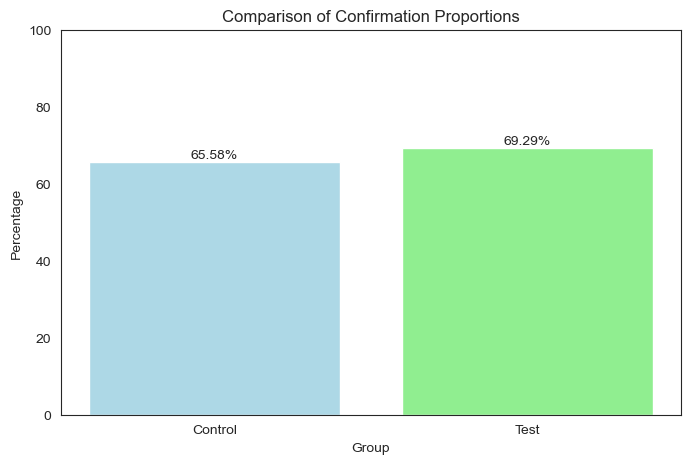

In [208]:
#plot Comparison of Confirmation Proportions
# control and test data from above
categories = ['Control', 'Test']
values = [proportion_confirm_control, proportion_confirm_test]

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['lightblue', 'lightgreen'])
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.title('Comparison of Confirmation Proportions')
plt.ylim(0, 100)  # Setting the y-axis limit from 0 to 100 for better visualization

# Display the percentage value on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v}%", ha='center', fontweight='normal')


# Show the plot
plt.show()

## Hypothesis Testing
## Completion Rate

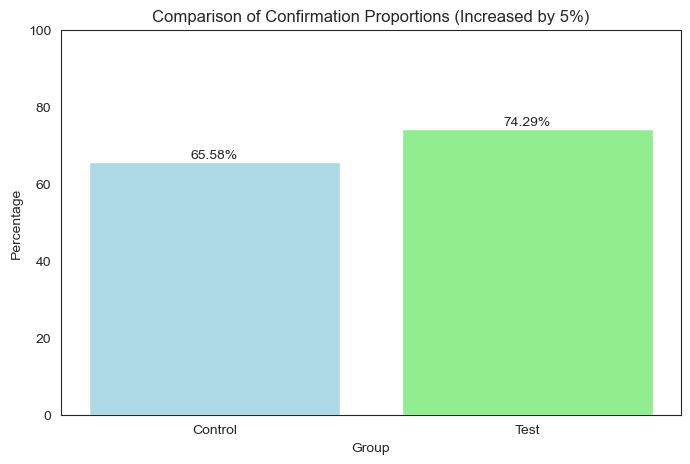

In [291]:
#plot Comparison of Confirmation Proportions increase with 5%
#Carried out an analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
# Increase by 5% 
increase_percentage = 5

proportion_confirm_control = proportion_confirm_control
new_proportion_confirm_test = proportion_confirm_test + increase_percentage

# Categories and new values
categories = ['Control', 'Test']
values = [proportion_confirm_control, new_proportion_confirm_test]

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['lightblue', 'lightgreen'])
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.title('Comparison of Confirmation Proportions (Increased by 5%)')
plt.ylim(0, 100)  # Setting the y-axis limit from 0 to 100 for better visualization

# Display the percentage value on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v}%", ha='center', fontweight='normal')

# Show the plot
plt.show()

In [ ]:
#Null Hypothesis (\(H_0\))): The completion rate for the Test group (new design) is equal to the completion rate for the Control group (old design).
#Alternative Hypothesis (\(H_a\))): The completion rate for the Test group (new design) is not equal to the completion rate for the Control group (old design).
#To test this hypothesis, you will use a two-proportion z-test. This test is appropriate when comparing proportions (like completion rates) between two groups

# z-test

In [ ]:
#from scipy.stats import ttest_ind

In [215]:
import scipy.stats as st

In [224]:

#Valid Values: Ensure the values inside the square root calculation are always valid. This involves ensuring p_pool (pooled proportion) remains within the range [0, 1].
# sample size of control and test group

proportion_confirm_control_1 = round((sum_drop_control / sum_confirms_control), 2)
proportion_confirm_test_1 = round((sum_drop_test / sum_confirms_test), 2)

In [229]:
# proportion of control group reaching the last step

p1 = proportion_confirm_control_1
p2 = proportion_confirm_test_1


n1 = sum_drop_control
n2 = sum_drop_test


In [230]:
# Number of successes
x1 = p1 * n1
x2 = p2 * n2

In [231]:
# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

z = (p1 - p2) / se

In [238]:
# P-value
p_value = (1 - st.norm.cdf(abs(z)))*2

In [239]:
#p_value = st.t.sf(abs(stat), n-1)*2
p_value

3.754396127320092e-09

In [236]:
# Output results
print(f"Test statistic (z): {z}")
print(f"P-value: {p_value}")

Test statistic (z): -5.894666166610228
P-value: 3.754396127320092e-09


In [237]:
# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The completion rate for the Test group (new design) is equal to the completion rate for the Control group (old design).")
else:
    print("Fail to reject the null hypothesis: The completion rate for the Test group (new design) is not equal to the completion rate for the Control group (old design).")

Reject the null hypothesis: The completion rate for the Test group (new design) is equal to the completion rate for the Control group (old design).


## z-test with 5% in test group

Null Hypothesis (\(H_0\)): The completion rate for the Test group (new design) is equal to or less than the completion rate for the Control group (old design) increased by 5%.
Alternative Hypothesis (\(H_a\)): The completion rate for the Test group (new design) is greater than the completion rate for the Control group (old design) increased by 5%.

In [311]:
proportion_confirm_control_1 = round((sum_drop_control / sum_confirms_control), 2)
new_proportion_confirm_test= round((sum_drop_test / sum_confirms_test), 2)

In [312]:
new_proportion_confirm_test

0.69

In [310]:
proportion_confirm_control_1 = round((sum_drop_control / sum_confirms_control), 2)
new_proportion_confirm_test= round((sum_drop_test / sum_confirms_test), 2)

p1 = proportion_confirm_control_1
p2 = new_proportion_confirm_test


n1 = sum_drop_control
n2 = sum_drop_test

x1 = p1 * n1
x2 = p2 * n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

z = (p1 - p2) / se
# P-value
p_value = (1 - st.norm.cdf(abs(z)))*2

# Output results
print(f"Test statistic (z): {z}")
print(f"P-value: {p_value}")

Test statistic (z): -5.894666166610228
P-value: 3.754396127320092e-09


In [309]:
new_proportion_confirm_test

0.69

In [290]:
proportion_confirm_test_1

0.69

##  T-test for control and Test group

In [358]:
# Check the data type of the time_step_z column
print(step_confirm_time_control['time_step_z'].dtype)

timedelta64[ns]


In [345]:
# Convert to datetime if necessary
#step_confirm_time_control['time_step_z'] = pd.to_datetime(step_confirm_time_control['time_step_z'])

In [357]:
# Convert to datetime if necessary for control group
step_confirm_time_control['time_step_z'] = pd.to_timedelta(step_confirm_time_control['time_step_z'])

In [356]:
step_confirm_time_control['days'] = step_confirm_time_control['time_step_z'].dt.days
step_confirm_time_control['total_seconds'] = step_confirm_time_control['time_step_z'].dt.total_seconds()

# Convert total_seconds to hours, minutes, and seconds
step_confirm_time_control['hours'] = step_confirm_time_control['total_seconds'] // 3600
step_confirm_time_control['minutes'] = (step_confirm_time_control['total_seconds'] % 3600) // 60
step_confirm_time_control['seconds'] = step_confirm_time_control['total_seconds'] % 60

In [355]:
#filtering for those took less than one day and half an hour
## Filter for those that took less than 30 minutes (1800 seconds)

filter_confirm_control = step_confirm_time_control[(step_confirm_time_control['days'] == 0)]
filter_confirm_control = step_confirm_time_control[(step_confirm_time_control['seconds'] < 1800)]

In [350]:
# Convert to datetime if necessary for Test group
step_confirm_time['time_step_z'] = pd.to_timedelta(step_confirm_time['time_step_z'])

step_confirm_time['days'] = step_confirm_time['time_step_z'].dt.days
step_confirm_time['total_seconds'] = step_confirm_time['time_step_z'].dt.total_seconds()

# Convert total_seconds to hours, minutes, and seconds
step_confirm_time['hours'] = step_confirm_time['total_seconds'] // 3600
step_confirm_time['minutes'] = (step_confirm_time['total_seconds'] % 3600) // 60
step_confirm_time['seconds'] = step_confirm_time['total_seconds'] % 60

filter_confirm_test = step_confirm_time[(step_confirm_time['days'] == 0)]
filter_confirm_test = step_confirm_time[(step_confirm_time['seconds'] < 1800)]

In [354]:
#test t for comparison beteween CONFIRM in control and CONFIRM in test. 

# Calculate mean values for each group
mean_control = filter_confirm_control["seconds"].mean()
mean_test = filter_confirm_test["seconds"].mean()

# Perform independent t-test
t_statistic, p_value = st.ttest_ind(filter_confirm_control["seconds"], filter_confirm_test["seconds"], equal_var=False)


# Output the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for statistical significance (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

""" Conclusion:
Since the t-statistic is positive, it suggests that the mean time for the confirm step in the control group is indeed higher than the mean time for the confirm step in the test group.
Thus, the control group takes significantly longer on average to perform the confirm step compared to the test group.
"""

Independent t-test results:
T-statistic: 39.93396682971018
P-value: 0.0
Reject the null hypothesis. There is a significant difference.


' Conclusion:\nSince the t-statistic is positive, it suggests that the mean time for the confirm step in the control group is indeed higher than the mean time for the confirm step in the test group.\nThus, the control group takes significantly longer on average to perform the confirm step compared to the test group.\n'